In [3]:
import numpy as np
from modeling.statmodeling.AR import AR
from modeling.statmodeling.ARIMA import ARIMA_D, ARIMA_R
from modeling.statmodeling.SARIMAX import SARIMAX_D, SARIMAX_R
from util.tools import dotdict
from util.metrics import get_metrics
from util.data_visualization import plot_time_series, plot_acf, plot_pacf, plot_seasonal_difference

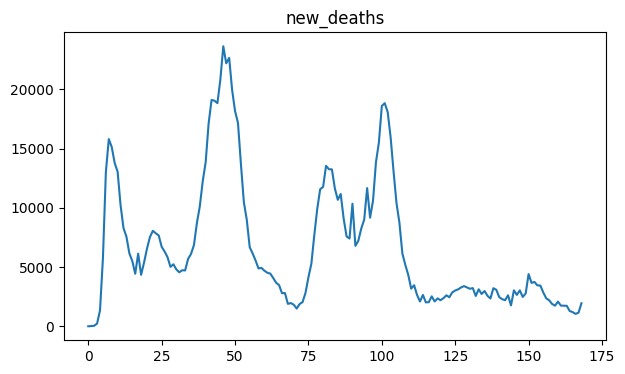

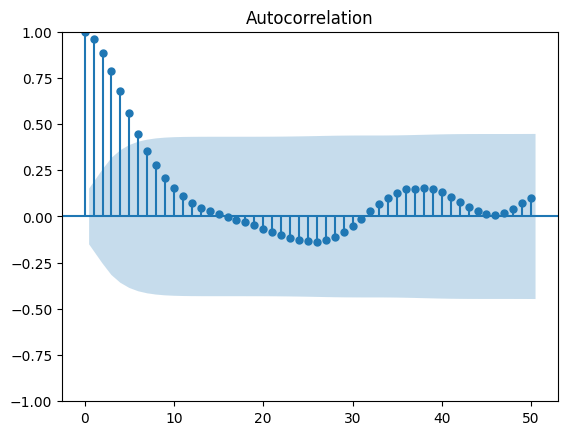

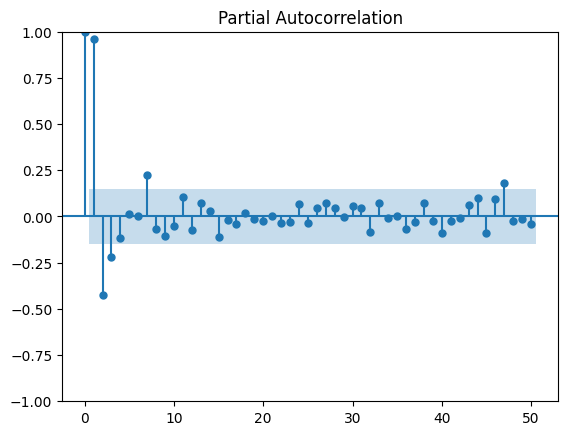

In [5]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.MO = 'new_deaths'
args.diff_order = None
args.lags = 50

plot_time_series(file_name = args.file_name, main_output = args.MO)

plot_acf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = args.diff_order)

plot_pacf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = args.diff_order)

100%|██████████| 82/82 [00:00<00:00, 107.18it/s]


Total Time:0.7955918312072754 seconds.


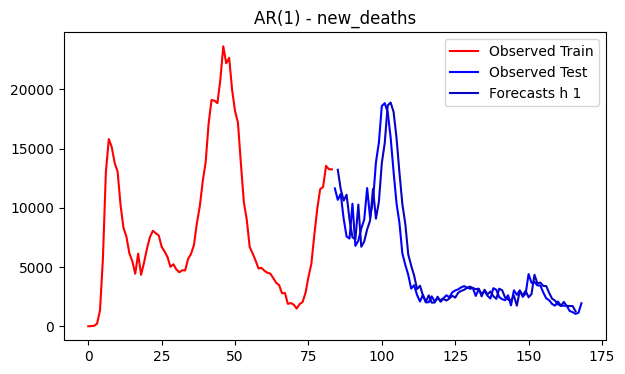

Out of Sample Test set metrics new_deaths
h:0, N:82, MSE:1424006.5917481335, MAE:802.3158557864444, sMAPE:15.030336801858983, RMSE:1193.3174731596507
h:1, N:82, MSE:3392992.107033105, MAE:1147.9472840174772, sMAPE:19.228987568610304, RMSE:1842.0076294720132
h:2, N:82, MSE:6017458.8808426, MAE:1488.7311201332975, sMAPE:24.449164662153244, RMSE:2453.050933193724
h:3, N:82, MSE:9364535.625188727, MAE:1808.129602084261, sMAPE:29.906308083097844, RMSE:3060.1528761139903
Average MSE: 5049748.301203141, Average MAE: 1311.78096550537, Average sMAPE: 22.153699278930095, Average RMSE: 2137.1322279848446


In [6]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.5
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.model = 'AR('+str(args.p)+')'
args.vis_h = 1
args.last_only = False
args.inverse_transform = False
args.trend = 'n'
actual, forecasts, model_ar = AR(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, vis_h = args.vis_h, last_only = args.LTSF, 
                                inverse_transform = args.inverse_transform, trend = args.trend)
get_metrics(actual = actual, forecasts = forecasts, args = args)

In [7]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  165
Model:                     AutoReg(1)   Log Likelihood               -1424.216
Method:               Conditional MLE   S.D. of innovations           1429.821
Date:                Sat, 02 Mar 2024   AIC                           2852.432
Time:                        20:06:15   BIC                           2858.631
Sample:                             1   HQIC                          2854.949
                                  165                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
new_deaths.L1     0.9866      0.013     77.286      0.000       0.962       1.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0136           +0.0000j            1.0136            0.0000
-----------------------------------------------------------------------------
"""

100%|██████████| 82/82 [00:01<00:00, 53.60it/s]


Total Time:1.6247186660766602 seconds.


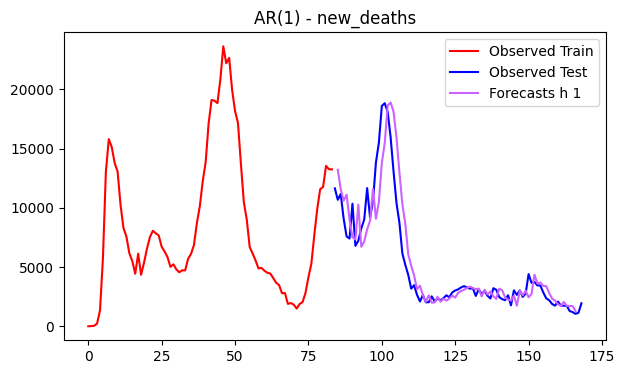

Test set metrics new_deaths
h:0, N:82, MSE:1424006.5917481335, MAE:802.3158557864444, sMAPE:15.030336801858983, RMSE:1193.3174731596507
h:1, N:82, MSE:3392992.107033105, MAE:1147.9472840174772, sMAPE:19.228987568610304, RMSE:1842.0076294720132
h:2, N:82, MSE:6017458.8808426, MAE:1488.7311201332975, sMAPE:24.449164662153244, RMSE:2453.050933193724
h:3, N:82, MSE:9364535.625188727, MAE:1808.129602084261, sMAPE:29.906308083097844, RMSE:3060.1528761139903
Average MSE: 5049748.301203141, Average MAE: 1311.78096550537, Average sMAPE: 22.153699278930095, Average RMSE: 2137.1322279848446


In [2]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.5
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.model = 'AR('+str(args.p)+')'
args.vis_h = 1
args.last_only = False
args.inverse_transform = False
args.trend = 'n'
actual, forecasts, model_ar = AR(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, vis_h = args.vis_h, last_only = args.LTSF, 
                                inverse_transform = args.inverse_transform, trend = args.trend)
get_metrics(actual = actual, forecasts = forecasts, args = args)

100%|██████████| 31/31 [00:02<00:00, 13.92it/s]


Total Time:2.29526686668396 seconds.


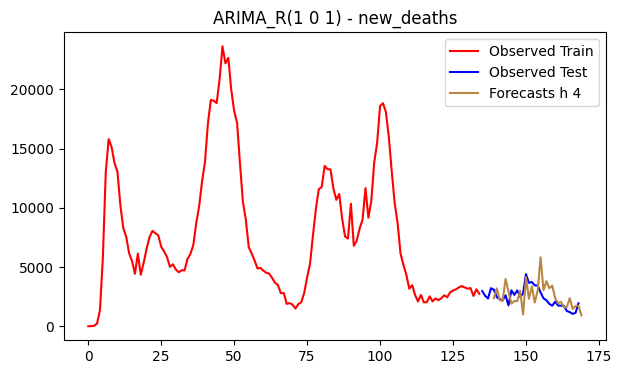

Test set metrics new_deaths
h:0, N:31, MSE:463649.4256404657, MAE:512.4538668541448, sMAPE:19.165977852605046, RMSE:680.9180755718456
h:1, N:31, MSE:659238.1271322292, MAE:614.7546317627817, sMAPE:23.479150283928288, RMSE:811.9348047301761
h:2, N:31, MSE:862935.7337269557, MAE:718.3938756015713, sMAPE:27.687870902367585, RMSE:928.9433425817506
h:3, N:31, MSE:1026552.9491200371, MAE:775.4417147608023, sMAPE:31.101262849923376, RMSE:1013.1894931946526
Average MSE: 753094.0589049219, Average MAE: 655.2610222448251, Average sMAPE: 25.35856547220607, Average RMSE: 858.7464290196062


In [2]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.8
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.d = 0
args.q = 1
args.model = 'ARIMA_R('+str(args.p)+" "+str(args.d)+" "+str(args.q)+')'
args.vis_h = 4
args.LTSF = False
args.inverse_transform = False

actual, forecasts, model_ar, predictions = ARIMA_R(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, q = args.q, d = args.d, vis_h = args.vis_h, 
                                LTSF = args.LTSF, inverse_transform = args.inverse_transform)
print("Test set metrics {}".format(args.MO))
total_mse, total_mae, total_smape, total_rmse = 0, 0, 0, 0
if args.LTSF:
    mse, mae, smape = getmetrics(np.expand_dims(actual[:, args.horizon - 1], axis = -1), np.expand_dims(forecasts[:, args.horizon - 1], axis = -1))
    print('h:{}, N:{}, MSE: {}, MAE: {}, sMAPE: {}'.format(args.vis_h, len(actual), mse, mae, smape))
else:
    for i in range(args.horizon):
        mse, mae, smape, rmse = getmetrics(np.expand_dims(actual[:,i], axis = -1), np.expand_dims(forecasts[:,i], axis = -1))
        total_mse += mse
        total_mae += mae
        total_smape += smape
        total_rmse += rmse
        print('h:{}, N:{}, MSE:{}, MAE:{}, sMAPE:{}, RMSE:{}'.format(i, len(actual), mse, mae, smape, rmse))
    avg_mse = total_mse / args.horizon
    avg_mae = total_mae / args.horizon
    avg_smape = total_smape / args.horizon
    avg_rmse = total_rmse / args.horizon
    print('Average MSE: {}, Average MAE: {}, Average sMAPE: {}, Average RMSE: {}'.format(avg_mse, avg_mae, avg_smape, avg_rmse))

In [3]:
np.sqrt(578475.2021185438)

760.5755729173425

In [4]:
residuals = actual[:,0] - forecasts[:,0] 
residuals.shape, residuals

((31,),
 array([ 4.42673095e+02, -5.24647217e+02, -3.12762628e+01,  9.80307038e+02,
        -5.58647463e+02, -5.52384161e+02,  1.27515423e+02, -3.91598627e+00,
         4.59771433e+02, -1.05862805e+03,  1.68680480e+03, -9.93851253e+02,
         5.63474860e+02, -7.34275964e+02,  5.46648696e+02,  1.50837024e+03,
        -1.52396876e+03,  4.26642657e+02, -3.27889203e+02,  1.23861188e+02,
        -5.77398736e+02, -2.22859043e+02,  6.62545553e+01, -2.32930851e+02,
        -1.16756997e+00,  4.11211838e+02, -4.98190745e+02,  1.48685281e+02,
        -3.80260036e+00, -4.35268962e+02,  1.12745940e+02]))

In [5]:
np.std(residuals)
737.0311948075108*(31/30)

761.5989013010945

In [8]:
bias = np.mean(residuals)
var = np.var(residuals)
(bias**2) + var

TypeError: SARIMAX_R() missing 2 required positional arguments: 'q' and 'd'

In [4]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                   84
Model:                     AutoReg(1)   Log Likelihood                -731.557
Method:               Conditional MLE   S.D. of innovations           1627.832
Date:                Sat, 02 Mar 2024   AIC                           1467.114
Time:                        15:54:43   BIC                           1471.952
Sample:                             1   HQIC                          1469.058
                                   84                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
new_deaths.L1     0.9974      0.018     56.663      0.000       0.963       1.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0026           +0.0000j            1.0026            0.0000
-----------------------------------------------------------------------------
"""

In [7]:
model_ar.conf_inf()

AttributeError: 'AutoRegResults' object has no attribute 'conf_inf'

100%|██████████| 31/31 [00:00<00:00, 86.27it/s]


Total Time:0.7815761566162109 seconds.


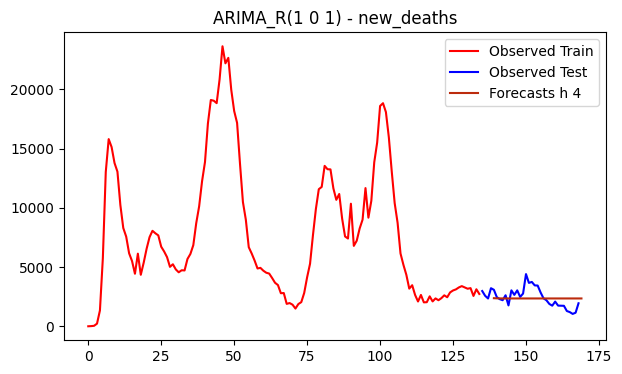

Test set metrics new_deaths
h:0, N:31, MSE:578475.2021185438, MAE:599.8161343625577, sMAPE:24.09867613092406
h:1, N:31, MSE:627000.7987229319, MAE:627.5988566098565, sMAPE:26.057891285479627
h:2, N:31, MSE:673175.1168687162, MAE:662.1002765027152, sMAPE:28.106838452771758
h:3, N:31, MSE:678444.8779659405, MAE:673.7020885706703, sMAPE:28.654064589556068
Average MSE: 639273.9989190331, Average MAE: 640.8043390114499, Average sMAPE: 26.72936761468288


In [3]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  135
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1157.475
Date:                Sat, 02 Mar 2024   AIC                           2318.950
Time:                        16:02:15   BIC                           2324.745
Sample:                             0   HQIC                          2321.305
                                - 135                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4891      0.052      9.492      0.000       0.388       0.590
sigma2      1.876e+06   1.55e+05     12.136      0.000    1.57e+06    2.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                34.13
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.02
Prob(H) (two-sided):                  0.81   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
predictions.conf_inf()

AttributeError: 'Series' object has no attribute 'conf_inf'

790.3320775277755

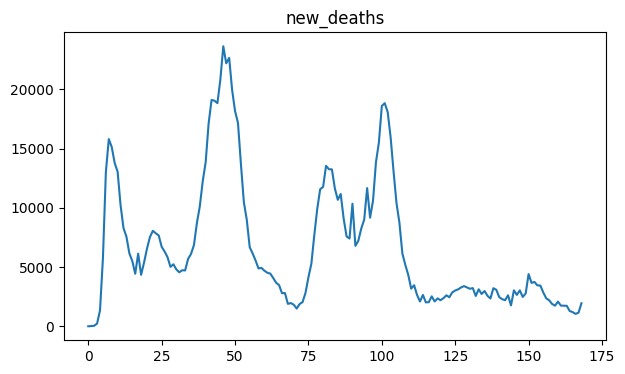

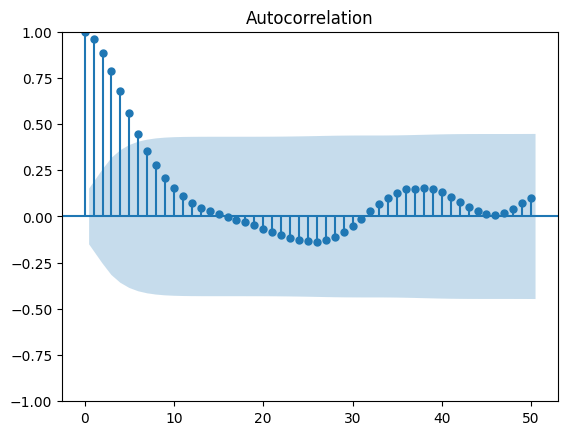

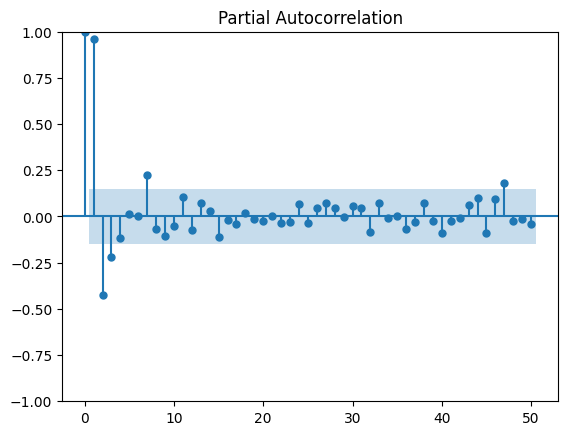

In [2]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.MO = 'new_deaths'
args.diff_order = None
args.lags = 50

plot_time_series(file_name = args.file_name, main_output = args.MO)

plot_acf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = args.diff_order)

plot_pacf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = args.diff_order)

100%|██████████| 82/82 [00:01<00:00, 44.45it/s]


Total Time:1.858976125717163 seconds.


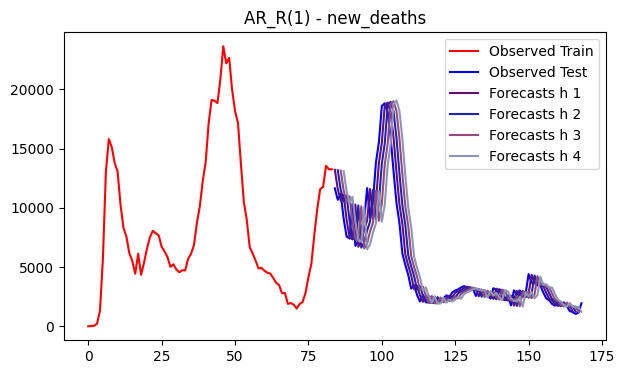

Test set metrics new_deaths
h:0, N:82, MSE:1424006.5917481335, MAE:802.3158557864444, sMAPE:15.030336801858983
h:1, N:82, MSE:3392992.107033105, MAE:1147.9472840174772, sMAPE:19.228987568610304
h:2, N:82, MSE:6017458.8808426, MAE:1488.7311201332975, sMAPE:24.449164662153244
h:3, N:82, MSE:9364535.625188727, MAE:1808.129602084261, sMAPE:29.906308083097844
Average MSE: 5049748.301203141, Average MAE: 1311.78096550537, Average sMAPE: 22.153699278930095


In [ ]:
args = dotdict()
args.file_name = 'datasets/ETT-small/ETTh1.csv'
args.training_ratio = 0.8
args.horizon = 720
args.MO = 'HUFL'
args.normalization = False
args.p = 336
args.model = 'AR_D('+str(args.p)+')'
args.vis_h = 720
args.LTSF = True
args.inverse_transform = False

actual, forecasts = AR_D(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, vis_h = args.vis_h,LTSF = args.LTSF, 
                                inverse_transform = args.inverse_transform)
print("Test set metrics {}".format(args.MO))
total_mse, total_mae, total_smape = 0, 0, 0
if args.LTSF:
    mse, mae, smape = getmetrics(np.expand_dims(actual[:, args.horizon - 1], axis = -1), np.expand_dims(forecasts[:, args.horizon - 1], axis = -1))
    print('MSE: {}, MAE: {}, sMAPE: {}'.format(mse, mae, smape))
else:
    for i in range(args.horizon):
        mse, mae, smape = getmetrics(np.expand_dims(actual[:,i], axis = -1), np.expand_dims(forecasts[:,i], axis = -1))
        total_mse += mse
        total_mae += mae
        total_smape += smape
        print('h:{}, N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(i, len(actual), mse, mae, smape))
    avg_mse = total_mse / args.horizon
    avg_mae = total_mae / args.horizon
    avg_smape = total_smape / args.horizon
    print('Average MSE: {}, Average MAE: {}, Average sMAPE: {}'.format(avg_mse, avg_mae, avg_smape))

100%|██████████| 82/82 [00:01<00:00, 41.10it/s]


Total Time:2.044769048690796 seconds.


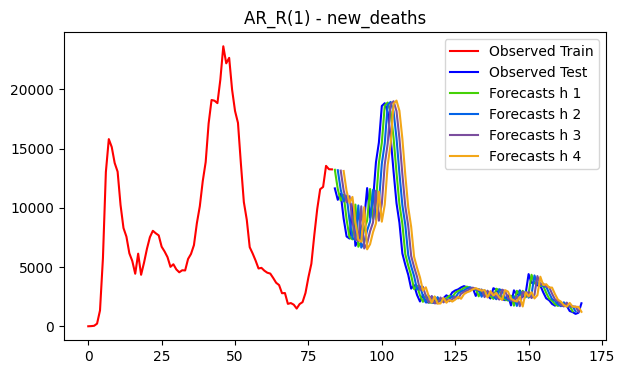

Test set metrics new_deaths
h:0, N:82, MSE:1424006.5917481335, MAE:802.3158557864444, sMAPE:15.030336801858983
h:1, N:82, MSE:3392992.107033105, MAE:1147.9472840174772, sMAPE:19.228987568610304
h:2, N:82, MSE:6017458.8808426, MAE:1488.7311201332975, sMAPE:24.449164662153244
h:3, N:82, MSE:9364535.625188727, MAE:1808.129602084261, sMAPE:29.906308083097844
Average MSE: 5049748.301203141, Average MAE: 1311.78096550537, Average sMAPE: 22.153699278930095


In [3]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.5
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.model = 'AR_R('+str(args.p)+')'
args.vis_h = None
args.LTSF = False
args.inverse_transform = False

actual, forecasts = AR_D(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, vis_h = args.vis_h,LTSF = args.LTSF, 
                                inverse_transform = args.inverse_transform)
print("Test set metrics {}".format(args.MO))
total_mse, total_mae, total_smape = 0, 0, 0
if args.LTSF:
    mse, mae, smape = getmetrics(np.expand_dims(actual[:, args.horizon - 1], axis = -1), np.expand_dims(forecasts[:, args.horizon - 1], axis = -1))
    print('MSE: {}, MAE: {}, sMAPE: {}'.format(mse, mae, smape))
else:
    for i in range(args.horizon):
        mse, mae, smape = getmetrics(np.expand_dims(actual[:,i], axis = -1), np.expand_dims(forecasts[:,i], axis = -1))
        total_mse += mse
        total_mae += mae
        total_smape += smape
        print('h:{}, N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(i, len(actual), mse, mae, smape))
    avg_mse = total_mse / args.horizon
    avg_mae = total_mae / args.horizon
    avg_smape = total_smape / args.horizon
    print('Average MSE: {}, Average MAE: {}, Average sMAPE: {}'.format(avg_mse, avg_mae, avg_smape))

100%|██████████| 82/82 [00:00<00:00, 190.31it/s]


Total Time:0.4329710006713867 seconds.


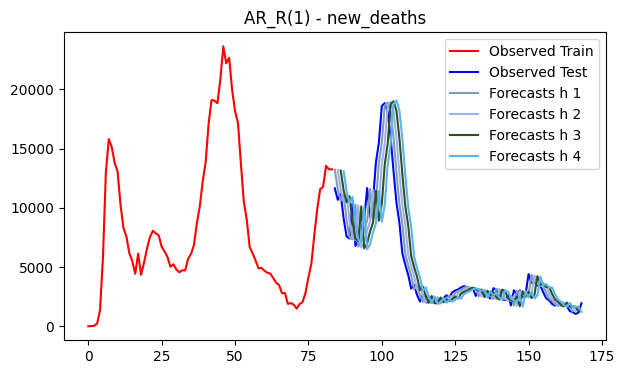

Test set metrics new_deaths
h:0, N:82, MSE:1424006.5917481335, MAE:802.3158557864444, sMAPE:15.030336801858983
h:1, N:82, MSE:3392992.107033105, MAE:1147.9472840174772, sMAPE:19.228987568610304
h:2, N:82, MSE:6017458.8808426, MAE:1488.7311201332975, sMAPE:24.449164662153244
h:3, N:82, MSE:9364535.625188727, MAE:1808.129602084261, sMAPE:29.906308083097844
Average MSE: 5049748.301203141, Average MAE: 1311.78096550537, Average sMAPE: 22.153699278930095


In [4]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.5
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.model = 'AR_R('+str(args.p)+')'
args.vis_h = None
args.LTSF = False
args.inverse_transform = False

actual, forecasts = AR_R(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, vis_h = args.vis_h, LTSF = args.LTSF,
                                inverse_transform = args.inverse_transform)
print("Test set metrics {}".format(args.MO))
total_mse, total_mae, total_smape = 0, 0, 0
if args.LTSF:
    mse, mae, smape = getmetrics(np.expand_dims(actual[:, args.horizon - 1], axis = -1), np.expand_dims(forecasts[:, args.horizon - 1], axis = -1))
    print('h:{}, N:{}, MSE: {}, MAE: {}, sMAPE: {}'.format(args.vis_h, len(actual), mse, mae, smape))
else:
    for i in range(args.horizon):
        mse, mae, smape = getmetrics(np.expand_dims(actual[:,i], axis = -1), np.expand_dims(forecasts[:,i], axis = -1))
        total_mse += mse
        total_mae += mae
        total_smape += smape
        print('h:{}, N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(i, len(actual), mse, mae, smape))
    avg_mse = total_mse / args.horizon
    avg_mae = total_mae / args.horizon
    avg_smape = total_smape / args.horizon
    print('Average MSE: {}, Average MAE: {}, Average sMAPE: {}'.format(avg_mse, avg_mae, avg_smape))

100%|██████████| 31/31 [00:10<00:00,  3.02it/s]


Total Time:10.257472038269043 seconds.


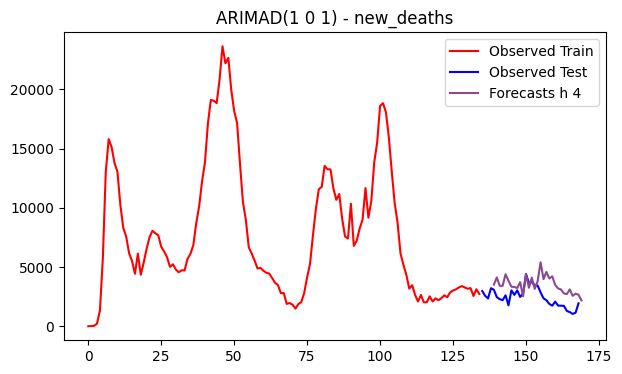

Test set metrics new_deaths
h:0, N:31, MSE:478442.7249174783, MAE:568.4348671595426, sMAPE:20.994558023719218
h:1, N:31, MSE:762552.115416604, MAE:754.887353207193, sMAPE:28.514863034083856
h:2, N:31, MSE:1228084.2013917281, MAE:973.6606753457297, sMAPE:36.58527226946232
h:3, N:31, MSE:1788649.0447160804, MAE:1182.2992621573803, sMAPE:42.30614592534843
Average MSE: 1064432.0216104728, Average MAE: 869.8205394674615, Average sMAPE: 32.100209813153455


In [16]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.8
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.d = 0
args.q = 1
args.model = 'ARIMA_D('+str(args.p)+" "+str(args.d)+" "+str(args.q)+')'
args.vis_h = 4
args.LTSF = False
args.inverse_transform = False

actual, forecasts = ARIMA_D(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, q = args.q, d = args.d, vis_h = args.vis_h, 
                                LTSF = args.LTSF, inverse_transform = args.inverse_transform)
print("Test set metrics {}".format(args.MO))
total_mse, total_mae, total_smape = 0, 0, 0
if args.LTSF:
    mse, mae, smape = getmetrics(np.expand_dims(actual[:, args.horizon - 1], axis = -1), np.expand_dims(forecasts[:, args.horizon - 1], axis = -1))
    print('h:{}, N:{}, MSE: {}, MAE: {}, sMAPE: {}'.format(args.vis_h, len(actual), mse, mae, smape))
else:
    for i in range(args.horizon):
        mse, mae, smape = getmetrics(np.expand_dims(actual[:,i], axis = -1), np.expand_dims(forecasts[:,i], axis = -1))
        total_mse += mse
        total_mae += mae
        total_smape += smape
        print('h:{}, N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(i, len(actual), mse, mae, smape))
    avg_mse = total_mse / args.horizon
    avg_mae = total_mae / args.horizon
    avg_smape = total_smape / args.horizon
    print('Average MSE: {}, Average MAE: {}, Average sMAPE: {}'.format(avg_mse, avg_mae, avg_smape))

100%|██████████| 31/31 [00:00<00:00, 37.19it/s]


Total Time:0.8405020236968994 seconds.


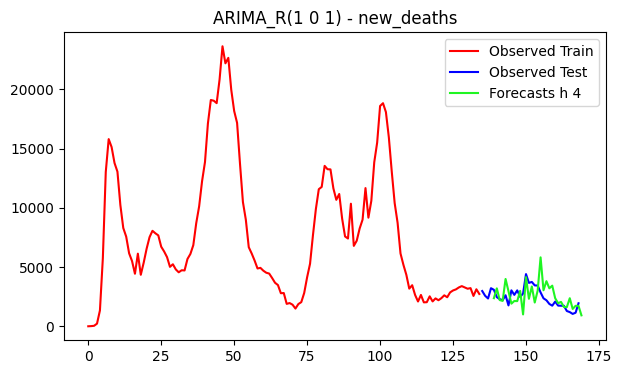

Test set metrics new_deaths
h:0, N:31, MSE:463649.4256404657, MAE:512.4538668541448, sMAPE:19.165977852605046
h:1, N:31, MSE:659238.1271322292, MAE:614.7546317627817, sMAPE:23.479150283928288
h:2, N:31, MSE:862935.7337269557, MAE:718.3938756015713, sMAPE:27.687870902367585
h:3, N:31, MSE:1026552.9491200371, MAE:775.4417147608023, sMAPE:31.101262849923376
Average MSE: 753094.0589049219, Average MAE: 655.2610222448251, Average sMAPE: 25.35856547220607


In [5]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.8
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.d = 0
args.q = 1
args.model = 'ARIMA_R('+str(args.p)+" "+str(args.d)+" "+str(args.q)+')'
args.vis_h = 4
args.LTSF = False
args.inverse_transform = False

actual, forecasts = ARIMA_R(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, q = args.q, d = args.d, vis_h = args.vis_h, 
                                LTSF = args.LTSF, inverse_transform = args.inverse_transform)
print("Test set metrics {}".format(args.MO))
total_mse, total_mae, total_smape = 0, 0, 0
if args.LTSF:
    mse, mae, smape = getmetrics(np.expand_dims(actual[:, args.horizon - 1], axis = -1), np.expand_dims(forecasts[:, args.horizon - 1], axis = -1))
    print('h:{}, N:{}, MSE: {}, MAE: {}, sMAPE: {}'.format(args.vis_h, len(actual), mse, mae, smape))
else:
    for i in range(args.horizon):
        mse, mae, smape = getmetrics(np.expand_dims(actual[:,i], axis = -1), np.expand_dims(forecasts[:,i], axis = -1))
        total_mse += mse
        total_mae += mae
        total_smape += smape
        print('h:{}, N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(i, len(actual), mse, mae, smape))
    avg_mse = total_mse / args.horizon
    avg_mae = total_mae / args.horizon
    avg_smape = total_smape / args.horizon
    print('Average MSE: {}, Average MAE: {}, Average sMAPE: {}'.format(avg_mse, avg_mae, avg_smape))

100%|██████████| 82/82 [00:43<00:00,  1.87it/s]


Total Time:43.906837701797485 seconds.


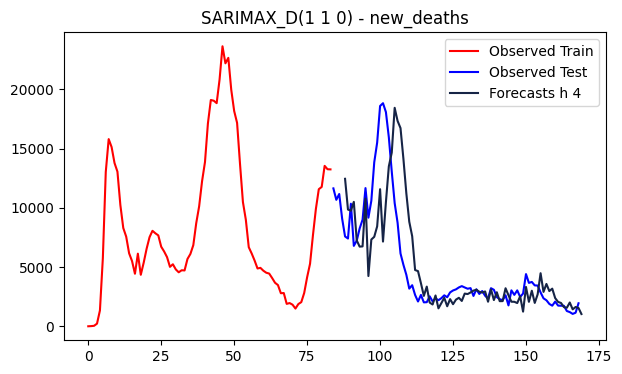

Test set metrics new_deaths
h:0, N:82, MSE:1520824.141003874, MAE:823.1626099244097, sMAPE:17.036591674057718
h:1, N:82, MSE:3234621.936655784, MAE:1147.352867600405, sMAPE:20.797333500570073
h:2, N:82, MSE:5355999.33343555, MAE:1446.3367562112453, sMAPE:25.374682681248593
h:3, N:82, MSE:8351399.9349468015, MAE:1719.7661599275182, sMAPE:30.531523395182976
Average MSE: 4615711.336510503, Average MAE: 1284.1545984158945, Average sMAPE: 23.43503281276484


In [4]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.5
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.d = 1
args.q = 0
args.model = 'SARIMAX_D('+str(args.p)+" "+str(args.d)+" "+str(args.q)+')'
args.vis_h = 4
args.LTSF = False
args.inverse_transform = False

actual, forecasts = SARIMAX_D(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, q = args.q, d = args.d, vis_h = args.vis_h, 
                                LTSF = args.LTSF, inverse_transform = args.inverse_transform)
print("Test set metrics {}".format(args.MO))
total_mse, total_mae, total_smape = 0, 0, 0
if args.LTSF:
    mse, mae, smape = getmetrics(np.expand_dims(actual[:, args.horizon - 1], axis = -1), np.expand_dims(forecasts[:, args.horizon - 1], axis = -1))
    print('h:{}, N:{}, MSE: {}, MAE: {}, sMAPE: {}'.format(args.vis_h, len(actual), mse, mae, smape))
else:
    for i in range(args.horizon):
        mse, mae, smape = getmetrics(np.expand_dims(actual[:,i], axis = -1), np.expand_dims(forecasts[:,i], axis = -1))
        total_mse += mse
        total_mae += mae
        total_smape += smape
        print('h:{}, N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(i, len(actual), mse, mae, smape))
    avg_mse = total_mse / args.horizon
    avg_mae = total_mae / args.horizon
    avg_smape = total_smape / args.horizon
    print('Average MSE: {}, Average MAE: {}, Average sMAPE: {}'.format(avg_mse, avg_mae, avg_smape))

  0%|          | 0/82 [00:00<?, ?it/s]/Users/maldosari/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['lags']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/maldosari/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
  1%|          | 1/82 [00:00<00:24,  3.36it/s]/Users/maldosari/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['lags']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/maldosari/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sar

Total Time:23.88810896873474 seconds.


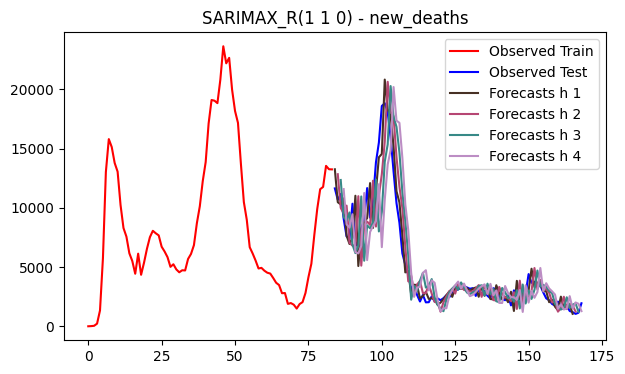

Test set metrics new_deaths
h:0, N:82, MSE:1449635.533166952, MAE:805.9720675001056, sMAPE:16.54136423032656
h:1, N:82, MSE:3125638.004105706, MAE:1164.9203518968461, sMAPE:22.094590340570697
h:2, N:82, MSE:5149966.376459369, MAE:1433.9067953805356, sMAPE:27.08633074273792
h:3, N:82, MSE:7986118.754735599, MAE:1683.3421119185368, sMAPE:31.222274771651396
Average MSE: 4427839.6671169065, Average MAE: 1272.035331674006, Average sMAPE: 24.236140021321646


In [7]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.5
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.d = 1
args.q = 0
args.model = 'SARIMAX_R('+str(args.p)+" "+str(args.d)+" "+str(args.q)+')'
args.vis_h = None
args.LTSF = False
args.inverse_transform = False

actual, forecasts = SARIMAX_R(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, q = args.q, d = args.d, vis_h = args.vis_h, 
                                LTSF = args.LTSF, inverse_transform = args.inverse_transform)
print("Test set metrics {}".format(args.MO))
total_mse, total_mae, total_smape = 0, 0, 0
if args.LTSF:
    mse, mae, smape = getmetrics(np.expand_dims(actual[:, args.horizon - 1], axis = -1), np.expand_dims(forecasts[:, args.horizon - 1], axis = -1))
    print('h:{}, N:{}, MSE: {}, MAE: {}, sMAPE: {}'.format(args.vis_h, len(actual), mse, mae, smape))
else:
    for i in range(args.horizon):
        mse, mae, smape = getmetrics(np.expand_dims(actual[:,i], axis = -1), np.expand_dims(forecasts[:,i], axis = -1))
        total_mse += mse
        total_mae += mae
        total_smape += smape
        print('h:{}, N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(i, len(actual), mse, mae, smape))
    avg_mse = total_mse / args.horizon
    avg_mae = total_mae / args.horizon
    avg_smape = total_smape / args.horizon
    print('Average MSE: {}, Average MAE: {}, Average sMAPE: {}'.format(avg_mse, avg_mae, avg_smape))

In [ ]:
args = dotdict()
args.file_name = 'datasets/ETT-small/ETTh1.csv'
args.MO = 'HUFL'
args.diff_order = None
args.lags = 200

plot_time_series(file_name = args.file_name, main_output = args.MO)

plot_acf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = None)

plot_acf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = 1)

#plot_pacf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = 1)

plot_seasonal_difference(file_name = args.file_name, main_output = args.MO, lags = args.lags, 
                         diff_order = 1, diff_orders = 24)